# Imports

In [1]:
import pandas as pd
from pandas import *
import numpy as np 
import os
import pandas.plotting as pdp
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
os.chdir('C:\\Users\\ShaRo\\Downloads')

# Data Loading

In [2]:
movieTitleDf = pd.read_csv('movie_titles.csv', engine='python', names = ['movieID','RYear','movieTitle', '1','2','3'], usecols=['movieID','RYear','movieTitle'])

In [3]:
ccdf = pd.DataFrame(columns = ['cusID', 'Rating', 'Datetime','movieID'])
for i in range(4):
    cdf = pd.read_csv('combined_data_'+str(i+1)+'.txt', engine='python', nrows=500000, names = ['cusID', 'Rating', 'Datetime','movieID'])
    ccdf = pd.concat([ccdf, cdf])
ccdf = ccdf.reset_index()

We'll be using only 500k rows to decrease the running time.

## MovieID Handling

In [4]:
for i, row in ccdf.iterrows():
    if row.isna()['Rating'] == True:
        mID = row['cusID'][0:-1]
    else:
        ccdf.iat[i,4] = mID
    
ccdf = ccdf.dropna()
ccdf = ccdf.drop(['index'],axis=1)

## Check for na leftovers

In [9]:
ccdf.isnull().any()

cusID       False
Rating      False
Datetime    False
movieID     False
dtype: bool

In [10]:
movieTitleDf.isnull().any()

movieID       False
RYear          True
movieTitle    False
dtype: bool

In [11]:
movieTitleDf[movieTitleDf.isnull()['RYear'] == True]

,movieID,RYear,movieTitle
4387,4388,NaN,Ancient Civilizations: Rome and Pompeii
4793,4794,NaN,Ancient Civilizations: Land of the Pharaohs
7240,7241,NaN,Ancient Civilizations: Athens and Greece
10781,10782,NaN,Roti Kapada Aur Makaan
15917,15918,NaN,Hote Hote Pyaar Ho Gaya
16677,16678,NaN,Jimmy Hollywood
17666,17667,NaN,Eros Dance Dhamaka


In [12]:
list(movieTitleDf[movieTitleDf.isnull()['RYear'] == True]['movieID'])

[4388, 4794, 7241, 10782, 15918, 16678, 17667]

In [13]:
len(movieTitleDf[movieTitleDf.isnull()['RYear'] == True])

7

#### Although there are only 7 instances and we'd wish to delete them, since there are many instances that correspond to those movies, we'd like to impute the average value.

In [14]:
int(movieTitleDf['RYear'].mean())

1990

## Col types handling

In [5]:
movieTitleDf['RYear'] = movieTitleDf['RYear'].fillna(movieTitleDf['RYear'].mean())

In [6]:
movieTitleDf['RYear'] = movieTitleDf['RYear'].astype('int64')

In [7]:
movieTitleDf.dtypes

movieID        int64
RYear          int64
movieTitle    object
dtype: object

In [7]:
ccdf['cusID'] = pd.to_numeric(ccdf['cusID'], downcast='signed')
ccdf['Rating'] = pd.to_numeric(ccdf['Rating'], downcast='signed')
ccdf['Datetime'] = pd.to_datetime(ccdf['Datetime'])
ccdf['movieID'] = pd.to_numeric(ccdf['movieID'], downcast='signed')
ccdf.dtypes

cusID                int32
Rating                int8
Datetime    datetime64[ns]
movieID              int16
dtype: object

In [8]:
ccdf = pd.merge(ccdf, movieTitleDf, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True, copy=True, indicator=False, validate=None)

In [20]:
ccdf.describe()

,cusID,Rating,movieID,RYear
count,1.999559e+06,1.999559e+06,1.999559e+06,1.999559e+06
mean,1.322146e+06,3.599695e+00,6.824379e+03,1.992781e+03
std,7.643332e+05,1.072003e+00,5.001652e+03,1.229016e+01
min,6.000000e+00,1.000000e+00,1.000000e+00,1.921000e+03
25%,6.606360e+05,3.000000e+00,4.500000e+03,1.989000e+03
50%,1.318010e+06,4.000000e+00,9.211000e+03,1.996000e+03
75%,1.983734e+06,4.000000e+00,1.336800e+04,2.002000e+03
max,2.649429e+06,5.000000e+00,1.343700e+04,2.005000e+03


In [21]:
ccdf.columns

Index(['cusID', 'Rating', 'Datetime', 'movieID', 'RYear', 'movieTitle'], dtype='object')

## Ratings Histogram

Text(0,0.5,'Count')

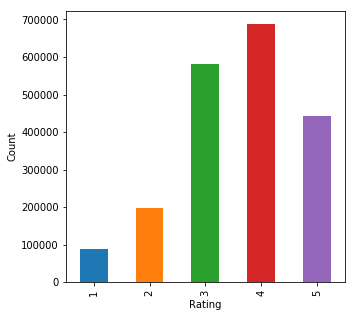

In [22]:
plt.figure(figsize=(5, 5))
ax = ccdf["Rating"].groupby(ccdf["Rating"]).count().plot(kind="bar")

plt.xticks(fontsize=10, rotation='vertical')
plt.xlabel("Rating", fontsize=10)  
plt.ylabel("Count", fontsize=10)  

In [29]:
ccdf["Rating"].agg([np.mean, np.median, np.var])

mean      3.599695
median    4.000000
var       1.149190
Name: Rating, dtype: float64

# Date Time Analysis

Next, we'll want to distinguish a trend in corresponds to the distribution of observations across time.


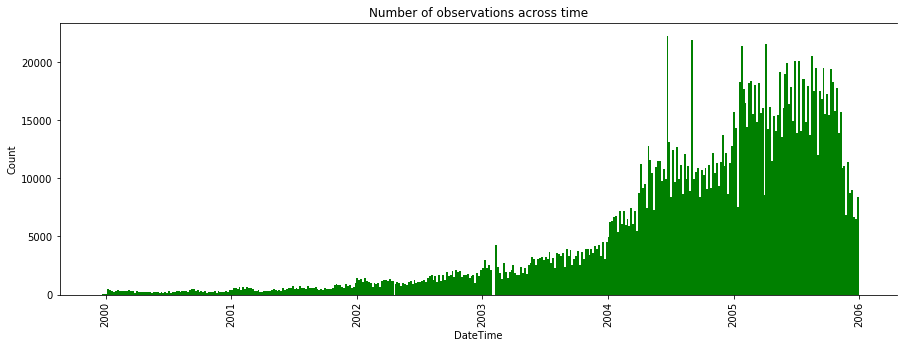

In [33]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(111)
ax.spines["top"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  
plt.xticks(fontsize=10, rotation='vertical')
plt.xlabel("DateTime", fontsize=10)  
plt.ylabel("Count", fontsize=10)
plt.title("Number of observations across time")
plt.hist(list(ccdf['Datetime']), color="green", bins = 400);

print("Next, we'll want to distinguish a trend in corresponds to the distribution of observations across time.")


In [51]:
print("Movie's Year Values: \n"+str(ccdf.RYear.unique()))
print("\nnumber of unique values: "+str(len(ccdf.RYear.unique())))

Movie's Year Values: 
[2003 2004 1997 1994 1992 1991 2001 1999 1947 1982 1988 1996 2005 2000
 1972 2002 1981 1962 1973 1964 1952 1941 1995 1969 1943 1989 1974 1954
 1956 1979 1951 1983 1998 1985 1965 1993 1976 1957 1987 1927 1978 1945
 1961 1966 1977 1959 1986 1990 1963 1942 1968 1955 1921 1938 1953 1975
 1960 1934 1939 1933 1940 1949 1980 1971 1984]

number of unique values: 65


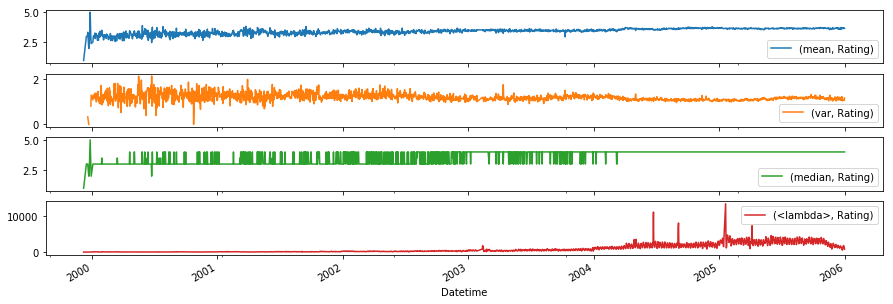

In [74]:
table = pivot_table(ccdf, values=["Rating"], index=["Datetime"], aggfunc=[np.mean, np.var, np.median, lambda x:len(x)])
table.plot(subplots=True, figsize=(15,5));

We can't learn anything from this analysis, since the variance is lowering with growing number of observations and the means stays the same.
the jumps in the median happen because of the "holes" mentioned earlier.

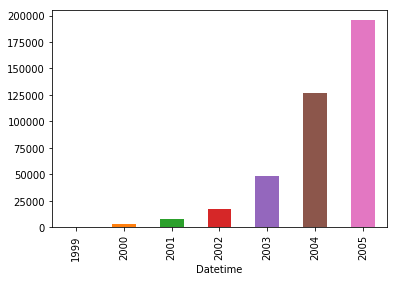

In [35]:
#DateTime Year histogram
ccdf["Datetime"].groupby(ccdf["Datetime"].dt.year).count().plot(kind="bar")

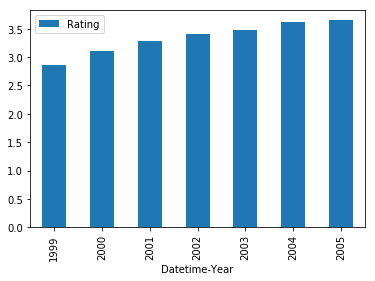

In [9]:
ccdf['Datetime-Year'] = ccdf['Datetime'].dt.year
table = pivot_table(ccdf, values=["Rating"],index=['Datetime-Year'], aggfunc=np.average)
table.plot(kind="bar")

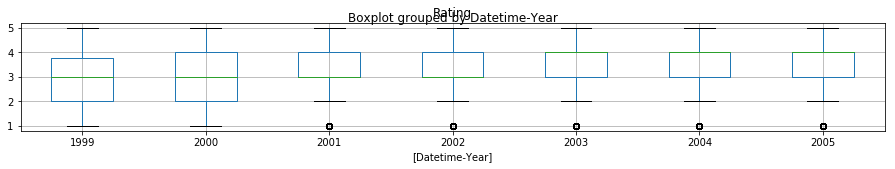

In [106]:
ccdf.boxplot(column = ['Rating'], by = ['Datetime-Year'], figsize= (15,2));

It can be inferred the people tended to right higher in more advanced years. 2005's Raters rate highest. <br>Box-Plot tells us, it was not a coincidence. the rating falls between the same limits.

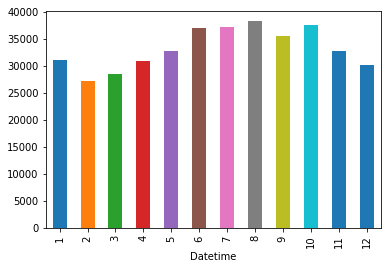

In [36]:
#DateTime Month histogram
ccdf["Datetime"].groupby(ccdf["Datetime"].dt.month).count().plot(kind="bar")

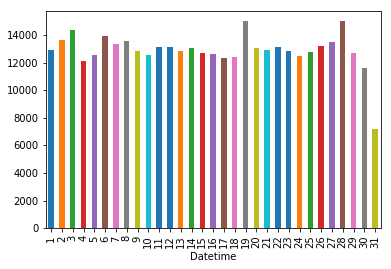

In [34]:
#DateTime Day histogram
ccdf["Datetime"].groupby(ccdf["Datetime"].dt.day).count().plot(kind="bar")

We don't notice anything too odd for to explore further out of those analysis. we would've if we saw big difference in the data on those, views.

as could be expected, most of the ratings are for newer movies, but there is too many 'incongruencies' in the graph, we'd like too look further.and bear that in mind for further analysis.
can be due to good years of cinema - biased raters-movies, altered database, some popular movies or other reasons.


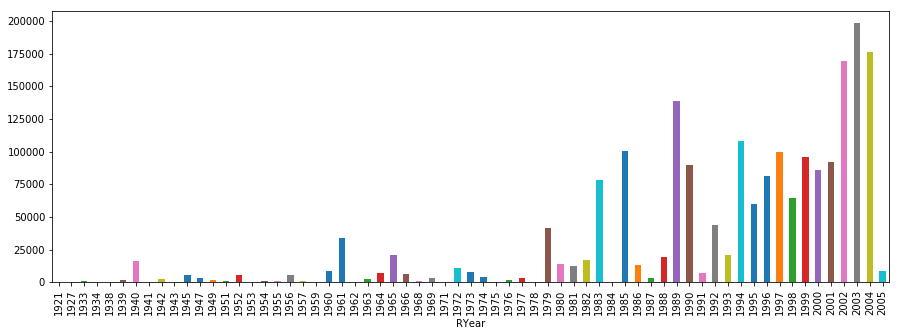

In [79]:
#Released Year histogram
plt.figure(figsize=(15, 5))
ccdf["RYear"].groupby(ccdf["RYear"]).count().plot(kind="bar");
print("as could be expected, most of the ratings are for newer movies, but there is too many 'incongruencies' in the graph, we'd like too look further.\
and bear that in mind for further analysis.\ncan be due to good years of cinema - biased raters-movies, altered database, some popular movies or other reasons.")

## Rolling Statistics of Rating

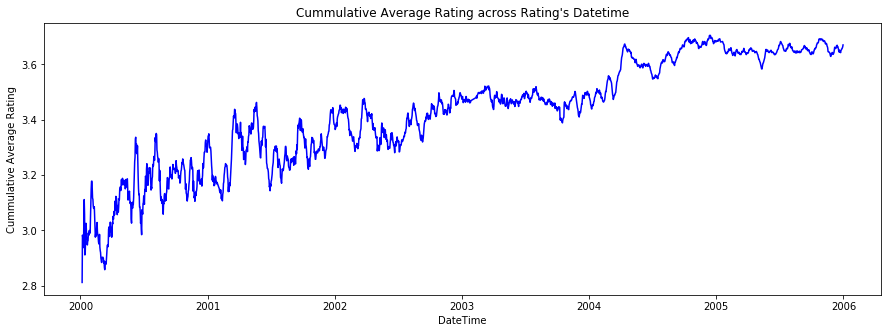

In [100]:
plt.figure(figsize=(15, 5))
#Against Rating's Submitted Timestamp
table1 = pivot_table(ccdf, values=["Rating"],index=["Datetime"], aggfunc=np.average).rolling(window=12, center=False).mean()

#Against Movie's Released Year
table2 = pivot_table(ccdf, values=["Rating"],index=["RYear"], aggfunc=np.average).rolling(window=12, center=False).mean()


plt.xlabel("DateTime", fontsize=10)  
plt.ylabel("Cummulative Average Rating", fontsize=10)
plt.title("Cummulative Average Rating across Rating's Datetime")
plt.plot(table1, color="blue");

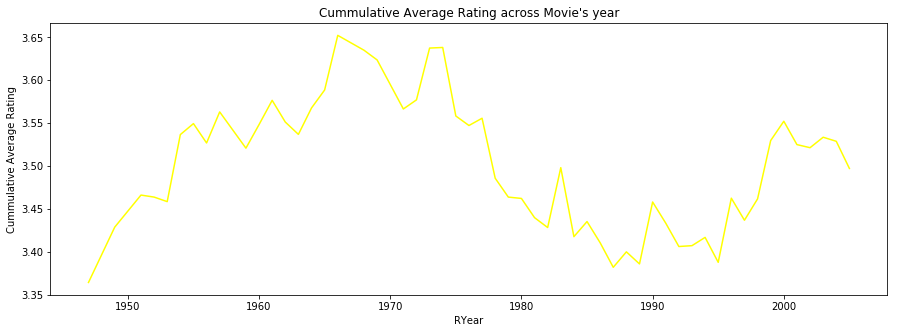

In [99]:
plt.figure(figsize=(15, 5))
plt.xlabel("RYear", fontsize=10)  
plt.ylabel("Cummulative Average Rating", fontsize=10)
plt.title("Cummulative Average Rating across Movie's year")
plt.plot(table2, color="yellow");

Against Rating's Timestamp we can see a clear upward trend: newer submitted rating tends to be higer. regardless of movie's year of release, which behaves differently, there are 2 peaks in ratings: 1970's and 2000's Movies. <br><br>Next, We'll want to recall the Rating's average for movie's year in order to understand the bigger picture.

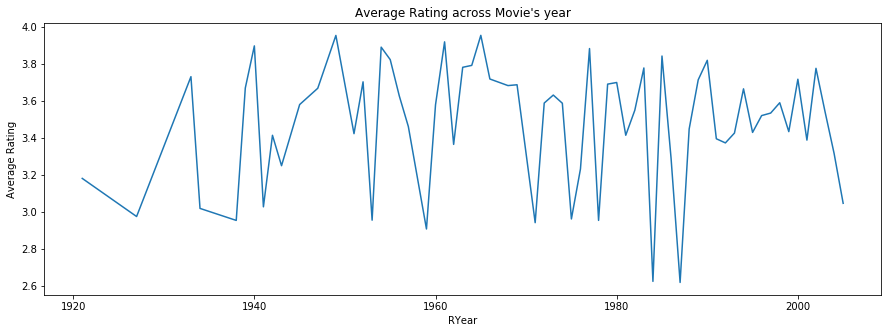

In [101]:
table = pivot_table(ccdf, values=["Rating"],index=['RYear'], aggfunc=np.average);
plt.figure(figsize=(15, 5))
plt.xlabel("RYear", fontsize=10)  
plt.ylabel("Average Rating", fontsize=10)
plt.title("Average Rating across Movie's year")
plt.plot(table);

We can't be sure of anything special because on the small number of observations in some year's (the gaps in between the graph)

,cusID,Rating,movieID,RYear,Datetime-Year
cusID,1.000000,-0.000871,-0.001171,-0.000213,0.002391
Rating,-0.000871,1.000000,0.032012,-0.076223,0.082258
movieID,-0.001171,0.032012,1.000000,-0.154015,-0.034638
RYear,-0.000213,-0.076223,-0.154015,1.000000,0.067384
Datetime-Year,0.002391,0.082258,-0.034638,0.067384,1.000000


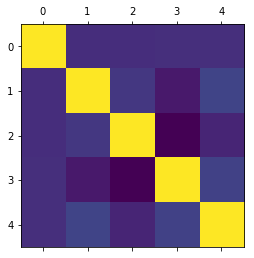

In [202]:
plt.matshow(ccdf.corr())
ccdf.corr()

As seen before, Datetime-year slightly correlates with the rating. and the ratings with the movie's themselves (which won't help us to predict new movie's ratings.<br>
another conclusion we can arrive at is there is no correlation between the customers and their ratings. 

In [120]:
table = pd.crosstab(columns=ccdf['Datetime-Year'],index=ccdf["RYear"], values=ccdf['Rating'], aggfunc=np.average).round(2)
print(table.sample(15))

Datetime-Year  1999  2000  2001  2002  2003  2004  2005
RYear                                                  
1981            NaN   NaN  2.92  2.80  3.04  3.41  3.55
1963            NaN  2.72  3.27  3.33  3.39  3.76  3.94
1953            NaN   NaN   NaN   NaN  2.93  3.04  2.90
1993            NaN   NaN  1.00  3.23  3.13  3.34  3.54
1995           2.25  2.57  2.86  2.93  3.17  3.45  3.62
2004            NaN   NaN   NaN   NaN  5.00  3.23  3.34
1957            NaN   NaN   NaN   NaN  3.29  3.42  3.59
1977            NaN   NaN  2.75  3.14  2.88  3.89  3.93
1986            NaN  3.04  3.10  3.02  3.16  3.35  3.38
1949            NaN   NaN   NaN   NaN   NaN  3.95  3.96
1992           3.20  2.90  2.94  3.09  3.17  3.32  3.48
1973            NaN   NaN  4.50   NaN  3.58  3.69  3.60
1942            NaN  3.46  2.99  3.01  3.20  3.38  3.66
1985            NaN  2.78  2.81  3.22  3.60  3.89  3.90
1983            NaN  3.38  3.56  3.58  3.71  3.80  3.83


<br><br>Counts-cross table:

In [121]:
table = pd.crosstab(columns=ccdf['Datetime-Year'],index=ccdf["RYear"], values=ccdf['Rating'], aggfunc=lambda x:len(x))
print(table.sample(15))

Datetime-Year  1999    2000    2001    2002     2003     2004     2005
RYear                                                                 
1993            NaN     NaN     2.0   756.0   2518.0   5950.0  11970.0
1997            3.0  3483.0  3475.0  4399.0  13633.0  31035.0  43566.0
1985            NaN   465.0  2406.0  1851.0   4122.0  25646.0  66257.0
1999            3.0  1934.0  2617.0  4808.0   9691.0  28595.0  48389.0
1976            NaN     4.0     6.0    28.0     48.0    348.0   1223.0
1995            4.0  2133.0  2145.0  1776.0   6349.0  19623.0  27726.0
1942            NaN    13.0   127.0   172.0    319.0    759.0    880.0
1966            NaN    12.0     NaN    13.0    231.0   4497.0   1354.0
1963            NaN    98.0    11.0     9.0    196.0    872.0   1329.0
2001            NaN     NaN   583.0  9951.0  12428.0  25366.0  43770.0
1943            NaN     NaN     NaN     NaN      NaN     71.0    113.0
1955            NaN     NaN     NaN     NaN      NaN     87.0    856.0
1977  

There are too many Nan values due to 0 observations for the cross of ratings' year and movie's year. (not rated movie's year)

# UserID  & MovieID Analysis

In [100]:
ccdf['cusID'].groupby(ccdf['Rating']).nunique()

Rating
1     55628
2    106881
3    200382
4    234990
5    189321
Name: cusID, dtype: int64

In [147]:
table = pivot_table(ccdf, values=["Rating"],index=["cusID"], aggfunc=[lambda x: len(x), np.average, np.var], margins=True)
print(table.sample(15))
print("\naverage number of ratings per user: %.2f" % np.mean(table['<lambda>','Rating'].round(2)))
print("with min and max of: "+ str((min(table['<lambda>','Rating']),max(table['<lambda>','Rating']))))
print("average rating between users : %.2f" % np.mean(table['average','Rating'].round(2)))
print("average variance between users' rating: %.2f" % np.mean(table['var','Rating'].round(2)))

        <lambda>   average       var
          Rating    Rating    Rating
cusID                               
1926057       15  2.866667  2.123810
1970073        2  3.000000  2.000000
185753         5  3.800000  0.700000
1700486        3  3.666667  5.333333
1094164        3  2.333333  0.333333
1733812        1  3.000000       NaN
2125599        4  3.500000  0.333333
250705         1  5.000000       NaN
1467066        1  4.000000       NaN
476589         1  4.000000       NaN
871630        11  3.272727  0.818182
2637596        6  3.500000  0.700000
1795768        4  4.250000  0.250000
2072811       32  3.500000  0.516129
596536         2  4.000000  2.000000

average number of ratings per user: 11.50
with min and max of: (1, 1999559)
average rating between users : 3.67
average variance between users' rating: 0.98


Text(0.5,0.98,'Distribution plot for average rating of user')

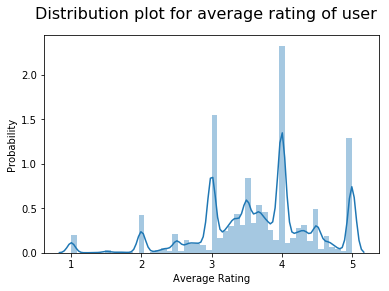

In [149]:
sns.distplot(pivot_table(ccdf, values=["Rating"],index=["cusID"], aggfunc=np.average))
plt.xlabel("Average Rating", fontsize=10)  
plt.ylabel("Probability", fontsize=10)  
plt.suptitle('Distribution plot for average rating of user', fontsize=16)

Percent of users rated only once in the dataset: 0.27
that explain the odd looking plot. thus we'll try to omit those rows.


Text(0.5,0.98,'Distribution plot for average rating of user')

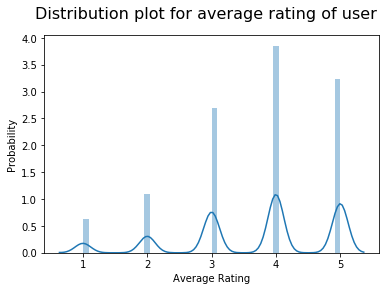

In [163]:
print("Percent of users rated only once in the dataset: %.2f" % (len(table[table['<lambda>','Rating'] == 1])/len(table['<lambda>','Rating'])))
table2 = table[table['<lambda>','Rating'] == 1]['average','Rating']
print("that explain the odd looking plot. thus we'll try to omit those rows.")
sns.distplot(table2)
plt.xlabel("Average Rating", fontsize=10)  
plt.ylabel("Probability", fontsize=10)  
plt.suptitle('Distribution plot for average rating of user', fontsize=16)

This time the plot looks standard for this kind of population.

### We'll use the same kind of analyzation for Movies in order to find oddities:

Text(0.5,0.98,'Distribution plot for average rating of movie')

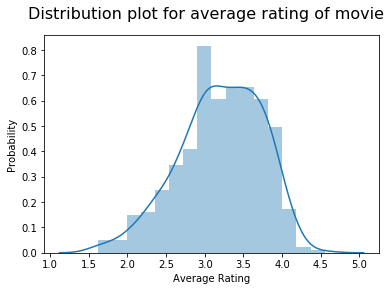

In [175]:
sns.distplot(pivot_table(ccdf, values=["Rating"],index=["movieID"], aggfunc=np.average))
plt.xlabel("Average Rating", fontsize=10)  
plt.ylabel("Probability", fontsize=10)  
plt.suptitle('Distribution plot for average rating of movie', fontsize=16)

Text(0.5,0.98,'Distribution plot for number of observations for movie')

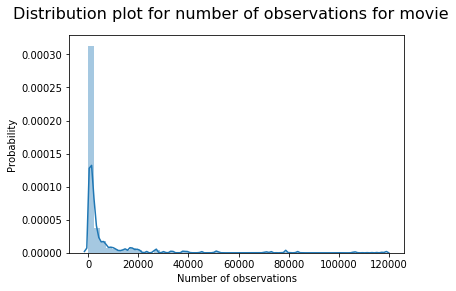

In [10]:
table = pivot_table(ccdf, values=["Rating"],index=["movieID"], aggfunc=lambda x:len(x))
sns.distplot(table)
plt.xlabel("Number of observations", fontsize=10)  
plt.ylabel("Probability", fontsize=10)
plt.suptitle('Distribution plot for number of observations for movie', fontsize=16)

trying to fit a distribution to the above distplot

In [13]:
ccdf.columns

Index(['cusID', 'Rating', 'Datetime', 'movieID', 'RYear', 'movieTitle',
       'Datetime-Year'],
      dtype='object')

Rating's across Movies: 
slope, intercept, r^2 accordingly: (0.5326356117343062, 3.2024968069907525, 0.9910545809710951)
from this analysis it can be guaranteed that Ratings across movies are distributed normally and we need'nt look further


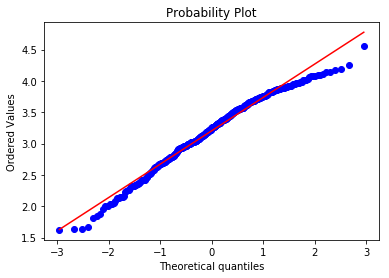

In [31]:
#Movie Quantiles
table = pd.DataFrame(pivot_table(ccdf, values=["Rating"],index=["movieID"], aggfunc=np.average).to_records())['Rating']
st = stats.probplot(table, plot=plt)
print("Rating's across Movies: \nslope, intercept, r^2 accordingly: "+str(st[1]))
print("from this analysis it can be guaranteed that Ratings across movies are distributed normally and we need'nt look further")

Rating's across Customers: 
slope, intercept, r^2 accordingly: (0.7954229423818004, 3.6713190903031143, 0.9770773742289377)
from this analysis it can be guaranteed that Ratings across cutomers are distributed normally and we need'nt look further
from the plot it can be seen that, like we earlier, there are some extreme rating customers


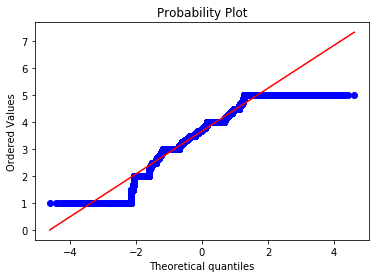

In [33]:
#Customer Quantiles
table = pd.DataFrame(pivot_table(ccdf, values=["Rating"],index=["cusID"], aggfunc=np.average).to_records())['Rating']
st = stats.probplot(table, plot=plt)
print("Rating's across Customers: \nslope, intercept, r^2 accordingly: "+str(st[1]))
print("from this analysis it can be guaranteed that Ratings across cutomers are distributed normally and we need'nt look further")
print("from the plot it can be seen that, like we earlier, there are some extreme rating customers")

## Rating / Year DF-Frequency Table 

In [35]:
table = pivot_table(ccdf, values=["Rating"],index=["cusID"], aggfunc=[np.average,lambda x:len(x),np.std])
table.columns = ['Avg','Customers Count','Std']
table2 = pivot_table(ccdf, values=["Rating"],index=["cusID"], aggfunc=lambda x:stats.mode(x)[0][0])
table2.columns = ['Mode']

table3 = pd.merge(pd.DataFrame(table.to_records()), pd.DataFrame(table2.to_records()), how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True, copy=True, indicator=False, validate=None)

table3.sample(25)

,cusID,Avg,Customers Count,Std,Mode
233094,1771264,4.000000,1,NaN,4
340824,2596100,4.000000,2,1.414214,3
192750,1465418,5.000000,1,NaN,5
64484,489357,3.333333,6,1.632993,5
75083,570640,4.666667,3,0.577350,5
238558,1813328,3.400000,5,0.894427,3
92594,703083,4.500000,6,0.547723,4
74246,564596,4.000000,1,NaN,4
289723,2206342,2.000000,5,0.707107,2
293809,2237922,3.090909,11,1.136182,3


#### Customers tend to rate differently, different bias (users who tend to right higher or lower than average), deviation (in their ratings),  moreover there are too many who users don't have enough instances to even be considered and we would like to remove from the dataset.

In [287]:
table = pivot_table(ccdf, values=["Rating"],index=["movieID"], aggfunc=[np.average,lambda x:len(x),np.std])
table.columns = ['Avg','Customers Count','Std']
table2 = pivot_table(ccdf, values=["Rating"],index=["movieID"], aggfunc=lambda x:stats.mode(x)[0][0])
table2.columns = ['Mode']

table3 = pd.merge(pd.DataFrame(table.to_records()), pd.DataFrame(table2.to_records()), how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True, copy=True, indicator=False, validate=None)

table3.sample(25)

,movieID,Avg,Customers Count,Std,Mode
352,9322,3.740170,1297,1.195877,4
356,9326,4.196017,7683,1.169828,5
137,138,3.942234,6007,1.181142,5
57,58,3.612008,17405,0.952229,4
298,9268,3.031621,253,1.253166,3
227,4579,3.039526,253,0.999215,3
291,9261,3.034783,115,1.297301,4
12,13,4.552000,125,0.665461,5
347,9317,3.377634,1234,1.132726,4
139,140,2.529412,119,1.056245,3


#### Movies tend to rated differently, they have higher instances and the standard deviation is more or less the same for all movies.

## Number of unique customers to rate movie analysis

Text(0.5,0.98,'Histogram plot: count cutomers per movie')

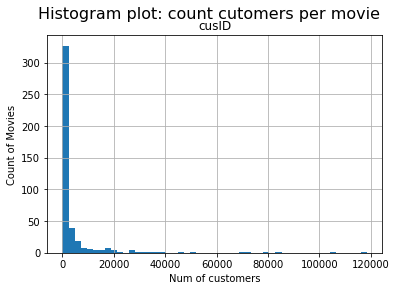

In [43]:
pivot_table(ccdf, values=["cusID"],index=["movieID"], aggfunc= lambda x: len(x.unique())).hist(bins=50)
plt.xlabel("Num of customers", fontsize=10)  
plt.ylabel("Count of Movies", fontsize=10)  
plt.suptitle('Histogram plot: count cutomers per movie', fontsize=16)

## Number of unique movies to be rated by customer

Text(0.5,0.98,'Histogram plot: count users per movie')

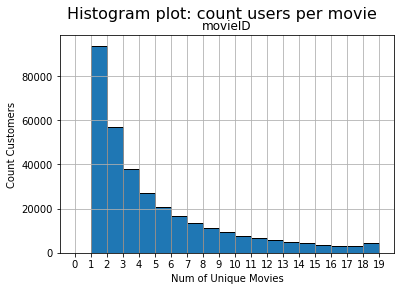

In [40]:
bins= range(20)
pivot_table(ccdf, values=["movieID"],index=["cusID"], aggfunc= lambda x: len(x.unique())).hist(bins=bins, edgecolor="k")
plt.xlabel("Num of Unique rated Movies", fontsize=10)  
plt.ylabel("Count Customers", fontsize=10)
plt.xticks(bins)
plt.suptitle('Histogram plot: count movies per customers', fontsize=16)

This side by side analysis shows us, on the one hand an evenly distributed number of users to rate a movie, that we'd expected to see, and on the other hand, complicated histogram of customers or popular movies tend to be watched and rated more or other reason.

In [288]:
# Rating's Count
table = pivot_table(ccdf, values=["cusID"],index=["Rating"], aggfunc= lambda x: len(x))
table.loc['Total'] = table.sum()
table

,cusID
Rating,
1,19734
2,41614
3,120996
4,134278
5,83277
Total,399899


# In Conclusion:

with the data in hand we could deduce that each cutomer acts differently for each movie but with a specific "rating bias" to begin with.
In order to deduce more information and analyze the data further we'll need to transform the data and fit different ditributions to each 'group' of measurements.
other than that, on the first look, that data distributes normally and evenly.